In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from selenium import webdriver
import main
import visuals
import seaborn as sns
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Get match data

In [3]:
if __name__ == "__main__":
    driver = webdriver.Firefox()

url = "https://www.whoscored.com/matches/1821280/live/england-premier-league-2024-2025-brentford-arsenal"
match_data = main.getMatchData(driver, url, close_window=True)

# Match dataframe containing info about the match
matches_df = main.createMatchesDF(match_data)

# Events dataframe      
events_df = main.createEventsDF(match_data)

# match Id
matchId = match_data['matchId']

# Information about respective teams as dictionary
home_data = matches_df['home'][matchId]
away_data = matches_df['away'][matchId]

Region: England, League: Premier League, Season: 2024/2025, Match Id: 1821280


# Calculate EPV for successful passes

In [4]:
events_df = main.addEpvToDataFrame(events_df)

# Get data for multiple matches

## getting competition urls

In [5]:
league_urls = main.getLeagueUrls()
# Updated league urls format: {country-league_name: url}
league_urls

{'africa-caf-champions-league': 'https://1xbet.whoscored.com/regions/248/tournaments/290/africa-caf-champions-league',
 'africa-caf-super-cup': 'https://1xbet.whoscored.com/regions/248/tournaments/573/africa-caf-super-cup',
 'africa-africa-cup-of-nations-qualification': 'https://1xbet.whoscored.com/regions/248/tournaments/747/africa-africa-cup-of-nations-qualification',
 'africa-african-nations-championship-qualification': 'https://1xbet.whoscored.com/regions/248/tournaments/754/africa-african-nations-championship-qualification',
 'africa-caf-champions-league-qualification': 'https://1xbet.whoscored.com/regions/248/tournaments/762/africa-caf-champions-league-qualification',
 'africa-caf-confederations-cup': 'https://1xbet.whoscored.com/regions/248/tournaments/574/africa-caf-confederations-cup',
 'africa-cecafa-senior-challenge-cup': 'https://1xbet.whoscored.com/regions/248/tournaments/505/africa-cecafa-senior-challenge-cup',
 'asia-gulf-cup': 'https://1xbet.whoscored.com/regions/249/to

## getting match urls for that competition and season

In [6]:
match_urls = main.getMatchUrls(comp_urls=league_urls, competition='england-premier-league', season='2024/2025')
match_urls[:5]

[{'away': 'Fulham',
  'date': 'Friday, Aug 16 2024',
  'home': 'Manchester United',
  'score': '1:0',
  'url': '/matches/1821049/live/england-premier-league-2024-2025-manchester-united-fulham'},
 {'away': 'Brighton',
  'date': 'Saturday, Aug 17 2024',
  'home': 'Everton',
  'score': '0:3',
  'url': '/matches/1821054/live/england-premier-league-2024-2025-everton-brighton'},
 {'away': 'Bournemouth',
  'date': 'Saturday, Aug 17 2024',
  'home': 'Nottingham Forest',
  'score': '1:1',
  'url': '/matches/1821056/live/england-premier-league-2024-2025-nottingham-forest-bournemouth'},
 {'away': 'Liverpool',
  'date': 'Saturday, Aug 17 2024',
  'home': 'Ipswich',
  'score': '0:2',
  'url': '/matches/1821050/live/england-premier-league-2024-2025-ipswich-liverpool'},
 {'away': 'Southampton',
  'date': 'Saturday, Aug 17 2024',
  'home': 'Newcastle',
  'score': '1:0',
  'url': '/matches/1821055/live/england-premier-league-2024-2025-newcastle-southampton'}]

## getting match urls for a specific team

In [7]:
team_urls = main.getTeamUrls(team='Arsenal', match_urls=match_urls)
team_urls[18]

{'away': 'Arsenal',
 'date': 'Wednesday, Jan 01 2025',
 'home': 'Brentford',
 'score': '1:3',
 'url': '/matches/1821280/live/england-premier-league-2024-2025-brentford-arsenal'}

## getting match data for the required urls

In [8]:
matches_data = main.getMatchesData(match_urls=team_urls[18:19])

Getting Match Data: 100%|█████████████████████████| 1/1 [00:14<00:00, 14.71s/it]


## getting events dataframe for required matches

In [9]:
events_ls = [main.createEventsDF(match) for match in matches_data]
# Add EPV column
events_list = [main.addEpvToDataFrame(match) for match in events_ls]
events_dfs = pd.concat(events_list)
events_dfs.head()

,id,eventId,minute,second,teamId,h_a,x,y,expandedMinute,period,...,penaltyShootoutSavedGK,penaltyShootoutConcededGK,throwIn,subOn,subOff,defensiveThird,midThird,finalThird,pos,EPV
0,2.763099e+09,3,0,0.0,13,a,0.0,0.0,0,FirstHalf,...,False,False,False,False,False,False,False,False,False,NaN
1,2.763099e+09,3,0,0.0,189,h,0.0,0.0,0,FirstHalf,...,False,False,False,False,False,False,False,False,False,NaN
2,2.763099e+09,4,0,0.0,189,h,49.8,50.0,0,FirstHalf,...,False,False,False,False,False,True,False,False,True,-0.0051
3,2.763099e+09,5,0,5.0,189,h,23.1,52.2,0,FirstHalf,...,False,False,False,False,False,False,False,True,True,NaN
4,2.763099e+09,4,0,7.0,13,a,31.5,90.1,0,FirstHalf,...,False,False,False,False,False,False,True,False,False,NaN


## saving events as csv

In [10]:
events_dfs.to_csv('data/events.csv')

In [11]:
events_dfs.columns

Index(['id', 'eventId', 'minute', 'second', 'teamId', 'h_a', 'x', 'y',
       'expandedMinute', 'period',
       ...
       'penaltyShootoutSavedGK', 'penaltyShootoutConcededGK', 'throwIn',
       'subOn', 'subOff', 'defensiveThird', 'midThird', 'finalThird', 'pos',
       'EPV'],
      dtype='object', length=259)

In [12]:
events_dfs.shape

(1508, 259)

In [13]:
print(events_dfs.head())
print(events_dfs.tail())

             id  eventId  minute  second  teamId h_a     x     y  \
0  2.763099e+09        3       0     0.0      13   a   0.0   0.0   
1  2.763099e+09        3       0     0.0     189   h   0.0   0.0   
2  2.763099e+09        4       0     0.0     189   h  49.8  50.0   
3  2.763099e+09        5       0     5.0     189   h  23.1  52.2   
4  2.763099e+09        4       0     7.0      13   a  31.5  90.1   

   expandedMinute     period  ... penaltyShootoutSavedGK  \
0               0  FirstHalf  ...                  False   
1               0  FirstHalf  ...                  False   
2               0  FirstHalf  ...                  False   
3               0  FirstHalf  ...                  False   
4               0  FirstHalf  ...                  False   

  penaltyShootoutConcededGK throwIn  subOn  subOff  defensiveThird midThird  \
0                     False   False  False   False           False    False   
1                     False   False  False   False           False    Fa

# Get pass data for a team

## All passes 

In [14]:
# Team data (from match data of single match)
team = 'Arsenal'
teamId = 13
opponent = 'Brentford'
venue = 'away'

# Get Player Names for home team
team_players_dict = {}
for player in matches_df[venue][match_data['matchId']].iloc[0][0]['players']:
    team_players_dict[player['playerId']] = player['name'] 
    
# Total Passes
passes_df = events_df.loc[events_df['type']=='Pass'].reset_index(drop=True)
passes_df = passes_df.loc[passes_df['outcomeType']=='Successful'].reset_index(drop=True)
passes_df = passes_df.loc[passes_df['teamId'] == teamId].reset_index(drop=True)
passes_df.head()

,id,eventId,minute,second,teamId,h_a,x,y,expandedMinute,period,...,penaltyShootoutSavedGK,penaltyShootoutConcededGK,throwIn,subOn,subOff,defensiveThird,midThird,finalThird,pos,EPV
0,2.763099e+09,7,0,43.0,13,a,67.2,23.4,0,FirstHalf,...,False,False,False,False,False,False,True,False,True,-0.0076
1,2.763099e+09,8,0,45.0,13,a,45.0,29.5,0,FirstHalf,...,False,False,False,False,False,False,False,True,True,0.0055
2,2.763099e+09,9,0,54.0,13,a,60.7,32.6,0,FirstHalf,...,False,False,False,False,False,False,True,False,True,0.0025
3,2.763099e+09,10,0,56.0,13,a,67.3,38.8,0,FirstHalf,...,False,False,False,False,False,False,True,False,True,-0.0051
4,2.763099e+09,11,1,0.0,13,a,55.3,37.3,1,FirstHalf,...,False,False,False,False,False,False,True,False,True,0.0042


## Passes cut into different durations

In [15]:
# Cut in 2
first_half_passes = passes_df.loc[passes_df['period']=='FirstHalf']
second_half_passes = passes_df.loc[passes_df['period']=='SecondHalf'].reset_index(drop=True)

# Cut in 4 (quarter = 25 mins)
first_quarter_passes = first_half_passes.loc[first_half_passes['minute'] <= 25]
second_quarter_passes = first_half_passes.loc[first_half_passes['minute'] > 25].reset_index(drop=True)
third_quarter_passes = second_half_passes.loc[second_half_passes['minute'] <= 70]
fourth_quarter_passes = second_half_passes.loc[second_half_passes['minute'] > 70].reset_index(drop=True)

first_quarter_passes.head()

,id,eventId,minute,second,teamId,h_a,x,y,expandedMinute,period,...,penaltyShootoutSavedGK,penaltyShootoutConcededGK,throwIn,subOn,subOff,defensiveThird,midThird,finalThird,pos,EPV
0,2.763099e+09,7,0,43.0,13,a,67.2,23.4,0,FirstHalf,...,False,False,False,False,False,False,True,False,True,-0.0076
1,2.763099e+09,8,0,45.0,13,a,45.0,29.5,0,FirstHalf,...,False,False,False,False,False,False,False,True,True,0.0055
2,2.763099e+09,9,0,54.0,13,a,60.7,32.6,0,FirstHalf,...,False,False,False,False,False,False,True,False,True,0.0025
3,2.763099e+09,10,0,56.0,13,a,67.3,38.8,0,FirstHalf,...,False,False,False,False,False,False,True,False,True,-0.0051
4,2.763099e+09,11,1,0.0,13,a,55.3,37.3,1,FirstHalf,...,False,False,False,False,False,False,True,False,True,0.0042


## Shotmap for a particular team

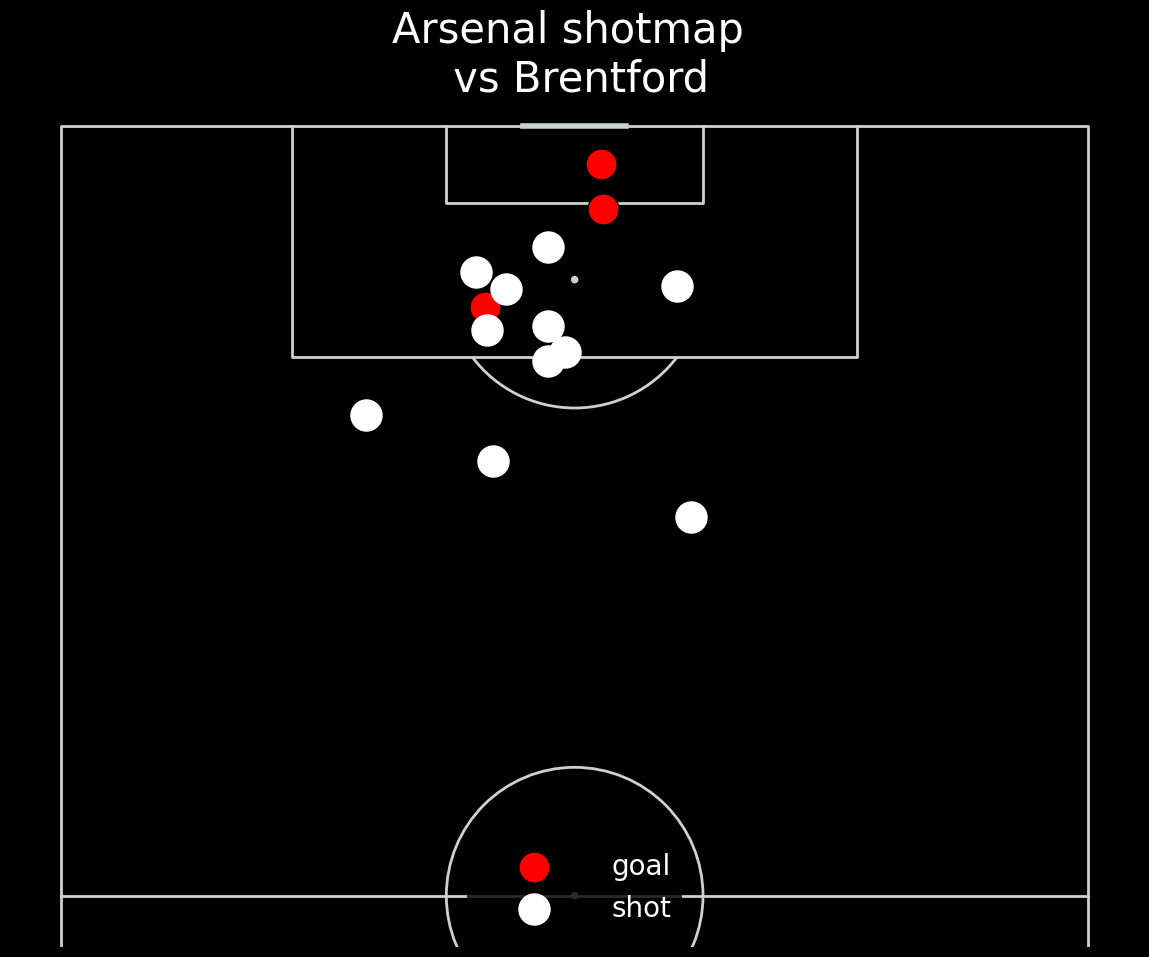

In [16]:
# Team data
team = 'Arsenal'
teamId = 65
opponent = 'Getafe'
venue = 'home'

fig,ax = plt.subplots(figsize=(16,11))
visuals.createShotmap(match_data, events_df, team='Arsenal', pitchcolor='black', shotcolor='white', 
                      goalcolor='red', titlecolor='white', legendcolor='white', marker_size=500, fig=fig, ax=ax)

## All passes made in a game

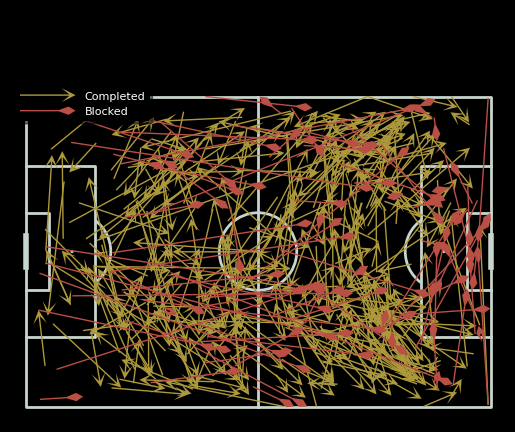

In [17]:
# All Passes
# Team data
team = 'Arsenal'
teamId = 13
opponent = 'Brentford'
venue = 'away'

visuals.getTeamTotalPasses(events_df, teamId, team, opponent, pitch_color='#000000')

## All box passes made in a game

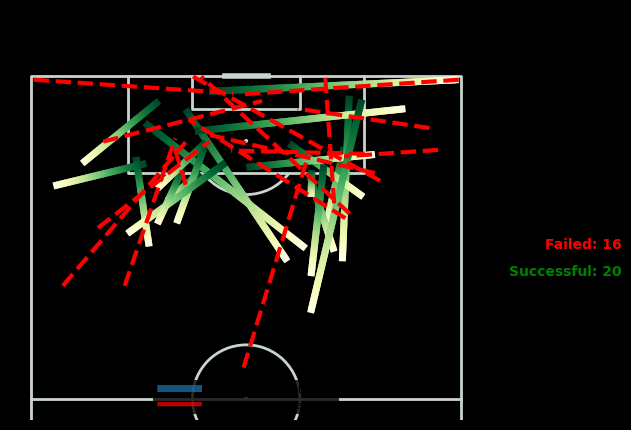

In [18]:
# Team data
team = 'Arsenal'
teamId = 13
opponent = 'Brentford'
venue = 'away'

visuals.getTeamBoxPasses(events_df, teamId, team, pitch_color='#000000', cmap='YlGn')

## Pass network between all players

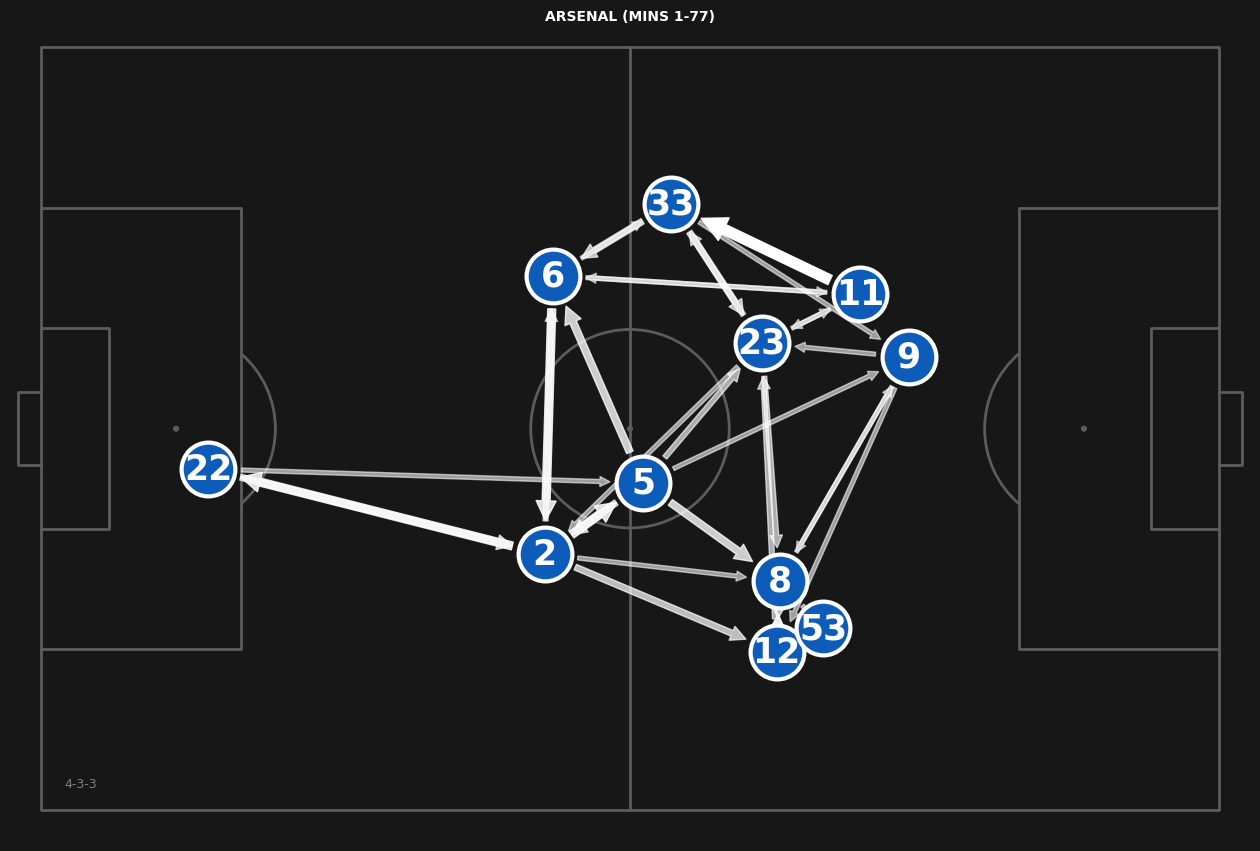

In [19]:
team = 'Arsenal'
teamId = 13
opponent = 'Brentford'
venue = 'away'

fig,ax = plt.subplots(figsize=(16,11))
fig.set_facecolor('#171717')
visuals.createPassNetworks(match_data, events_df, matchId=match_data['matchId'], team='Arsenal', max_line_width=6, 
                           marker_size=1500, edgewidth=3, dh_arrow_width=25, marker_color='#0e5cba',
                           marker_edge_color='w', shrink=24, ax=ax, kit_no_size=25)

## Progressive passes made in the game

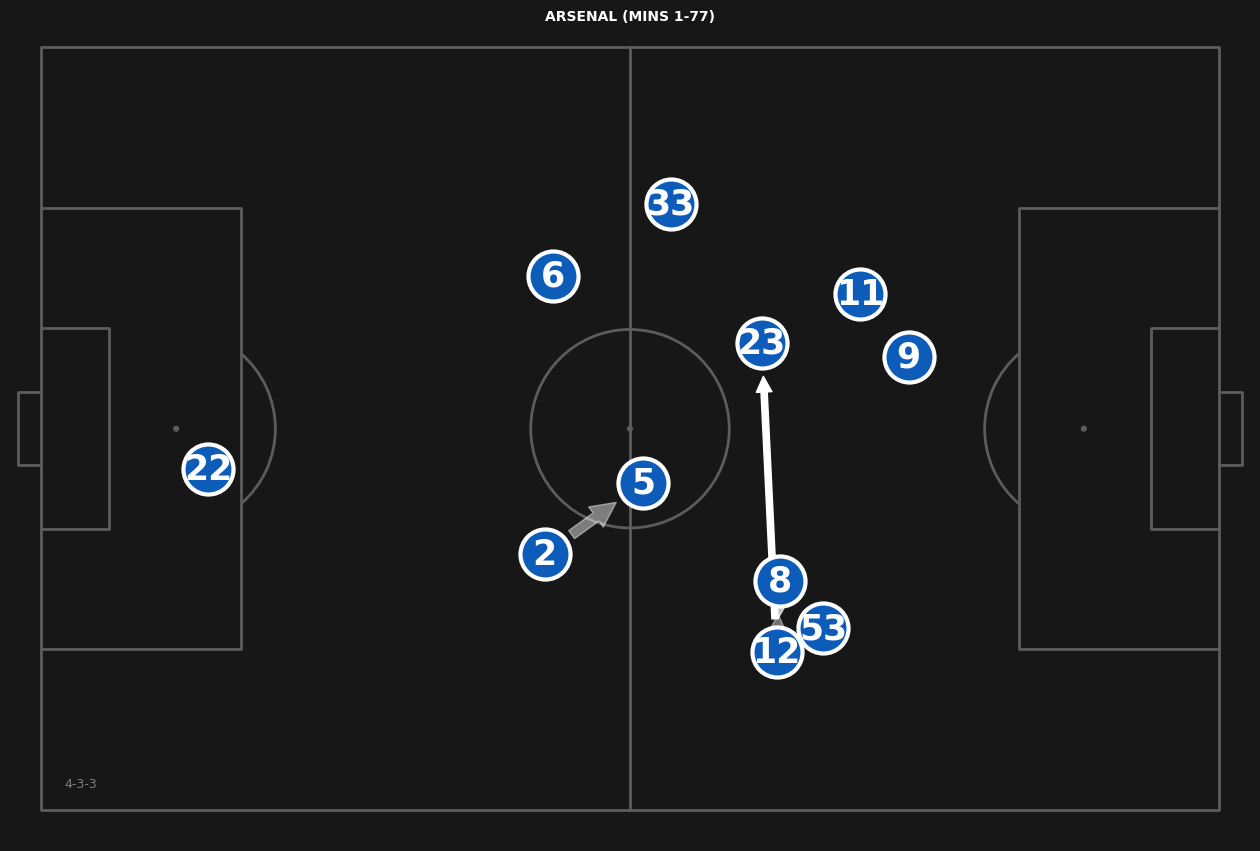

In [20]:
team = 'Arsenal'
teamId = 13
opponent = 'Brentford'
venue = 'away'

fig,ax = plt.subplots(figsize=(16,11))
fig.set_facecolor('#171717')
visuals.createAttPassNetworks(match_data, events_df, matchId=match_data['matchId'], team='Arsenal', max_line_width=6, 
                              marker_size=1300, edgewidth=3, dh_arrow_width=25, marker_color='#0e5cba', 
                              marker_edge_color='w', shrink=24, ax=ax, kit_no_size=25)

# Get PV formation map

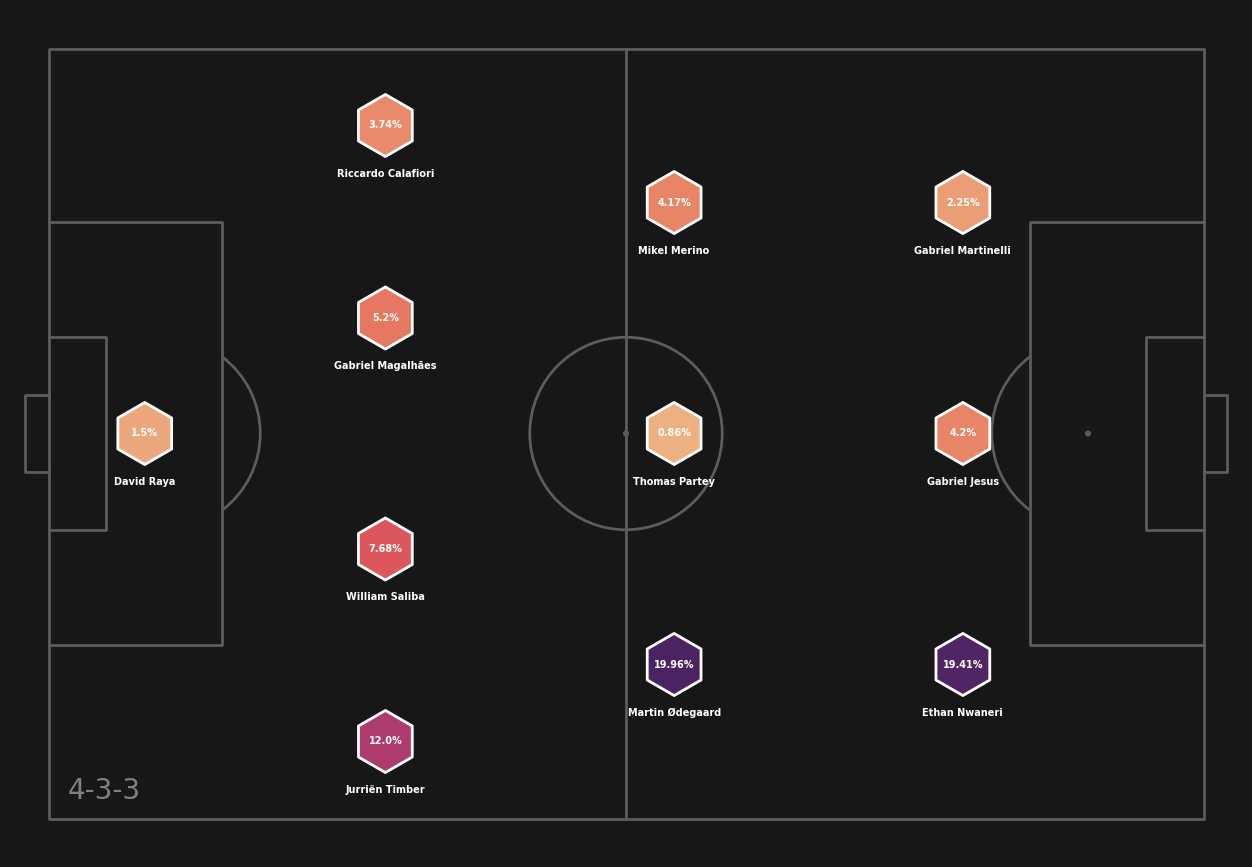

In [21]:
# Team data
team = 'Arsenal'
teamId = 65
opponent = 'Getafe'
venue = 'home'
# Choose your color palette from here: https://seaborn.pydata.org/tutorial/color_palettes.html
fig,ax = plt.subplots(figsize=(16,11))
fig.set_facecolor('#171717')
visuals.createPVFormationMap(match_data, events_df, team='Arsenal', color_palette=sns.color_palette("flare", as_cmap=True),
                             markerstyle='h', markersize=2000, markeredgewidth=2, labelsize=7, labelcolor='w', ax=ax)